<a href="https://colab.research.google.com/github/imraunav/MNIST-Dataset-classification/blob/main/ExampleMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from matplotlib import pyplot as plt
# import tensorflow as tf

# # import tensorflow_datasets as tfds # will learn to use this in the future
# from tensorflow.keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/Users/raunavghosh/Documents/Research for Vehant/MNIST/MNIST-Dataset-classification/mnist.npz')

# # Preprocessing
# # normalizing all values
# train_images = train_images/255.0
# test_images = test_images/255.0

# # convert all labels to one-hot notation
# # trian_labels = tf.one_hot(train_labels, 10)
# # test_labels = tf.one_hot(test_labels, 10)

# # following the tutorial at: https://www.tensorflow.org/tutorials/images/cnn
# from tensorflow.keras import models, layers

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# # adding dense layers
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

# # model summary
# # model.summary()

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(test_images, test_labels))

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Metal device set to: Apple M2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)        

2023-03-12 23:17:20.564881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-12 23:17:20.564995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15


2023-03-12 23:17:20.733809: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-12 23:17:20.906688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8895

2023-03-12 23:17:27.290211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 7s 16ms/step - loss: 0.3686 - accuracy: 0.8895 - val_loss: 0.0907 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 7s 16ms/step - loss: 0.1116 - accuracy: 0.9657 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 4/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0489 - val_accuracy: 0.9857
Epoch 5/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 7/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 8/15

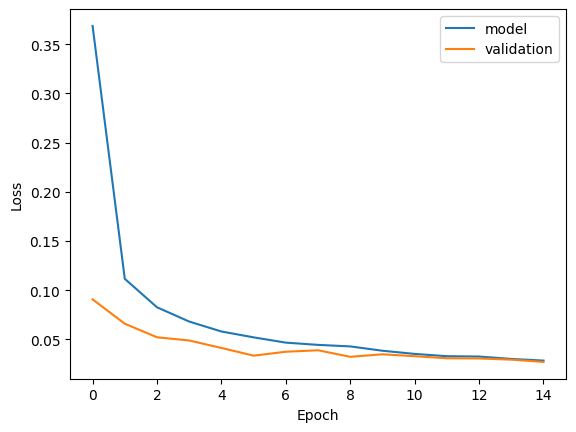

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='model')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

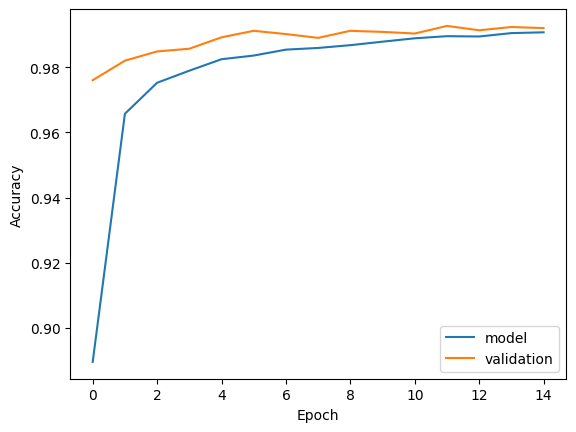

In [8]:
plt.plot(history.history['accuracy'], label='model')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
model(x_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[3.5611616e-09, 3.2166741e-10, 1.3562424e-06, ..., 9.9999702e-01,
        3.3790117e-09, 3.4431326e-07],
       [1.5049882e-06, 1.1400329e-06, 9.9999583e-01, ..., 2.8087565e-12,
        1.6314620e-07, 1.3262535e-11],
       [1.3670359e-06, 9.9939013e-01, 7.8068479e-06, ..., 6.9220987e-05,
        1.2111872e-05, 3.2806615e-06],
       ...,
       [5.9977219e-12, 6.0745853e-09, 3.9322896e-11, ..., 6.0369246e-08,
        8.2194413e-07, 1.5931640e-07],
       [3.4818333e-07, 8.6764938e-13, 7.2539810e-09, ..., 5.2366982e-11,
        2.4735738e-04, 2.9791883e-08],
       [7.3758139e-07, 7.6667214e-12, 3.5727840e-06, ..., 3.3575649e-13,
        5.9573631e-06, 3.3342527e-11]], dtype=float32)>